# Medidas de Tendência Central

#### MÉDIA

Resultado da soma dos valores dividido pelo número de valores.

Exemplo: A média de {1, 3, 2, 4, 3, 5} é 1+3+2+4+3+5/6 = 18/6 = 3

In [1]:
import statistics as s

lista_1 = [10, 20, 10, 30, 15, 25, 100]

s.mean(lista_1)

30

#### MEDIANA

Meio da distribuição, o valor que divide seu conjunto de valores em dois. Ou seja, metade dos valores está abaixo da mediana e metade está acima.

Exemplo: A mediana de {1, 1, 0, 5, 10, 12, 15} é 5. Veja que ordenando temos {0, 1, 1, 5, 10, 12, 15}, o número que deixa metade dos valores (3 valores) abaixo e metade acima é 5.

In [2]:
lista_2 = [1, 1, 0, 5, 10, 12, 15]

s.median(lista_2)

5

#### MODA

Valor mais frequente nas suas objervações.

A moda de {1, 1, 1, 0, 0, 2, 2, 5, 10, 9, 1, 0} é 1!

In [3]:
s.mode(lista_2)

1

In [4]:
lista_3 = [1, 1, 0, 0, 5, 5, 10, 12, 15]

s.mode(lista_3)

1

Atenção: Veja que a média é afetada por outliers, enquanto a mediana não. Imagine que você tem uma empresa com 100 funcionários, 30 deles ganham mil reais, 50 ganham 1200 reais, 15 ganham 900 reais e outros 5, executivos, ganham 30 mil reais. Veja abaixo as métricas referentes à empresa.

In [7]:
a = [1000]*30
b = [1200]*50
c = [900]*15
d = [30000]*5

salarios_com_outliers = a+b+c+d

print(f"A média salarial da empresa é de {s.mean(salarios_com_outliers):.2f} reais e a mediana é de {s.median(salarios_com_outliers):.2f} reais.")

A média salarial da empresa é de 2535.00 reais e a mediana é de 1200.00 reais.


Ao olharmos para as métricas, vemos que a média salarial é de 2.535 reais, um número não muito realista e superior ao que ganham 95% dos funcionários. Por que isso ocorreu? Porque os 5 executivos eram outliers e puxaram o valor da média para cima.

Veja, no entanto, que a mediana é de 1200 reais, um valor bem próximo da realidade da empresa.

É importante saber quando usar cada uma das duas para não olhar a métrica errada. Alguns cursos costumam indicar simplesmente que se utilize mediana. Pode ser uma estratégia segura para quem estiver com preguiça de pensar.

# Medidas de Dispersão

As métricas acima são chamadas de medidas de tendência central, pois buscam pontos centrais dos conjuntos de dados. Entretanto, elas ainda dizem pouco sobre seus dados. Veja os 3 conjuntos de dados abaixo:

A = {10, 10, 10, 10, 10}<br>
B = {50, 0, 0, 0, 0}<br>
C = {10, 7, 11, 13, 9}<br>

Os 3 possuem média 10, mesmo sendo bem diferentes. Poderíamos fazer o mesmo para a moda e mediana, mas acho que a maioria já entendeu meu ponto. A questão aqui é que estamos olhando para um ponto central, mas não estamos olhando para como esses valores estão "espalhados", como eles estão dispersos. Para isso, precisamos falar de medidas de dispersão!

#### VARIÂNCIA E DESVIO PADRÃO

Uma das formas mais intuitivas de verificar como os valores estão dispersos seria investigando qual a distância deles para a média. Entretanto, veja o que acontece quando fazemos isso:

A = {10, 20, 15, 15, 20}

Média de A: 16

Desvios da média de A: {-6, 4, -1, -1, 4}

Veja que se somarmos o quanto cada valor desvia da média, chegaremos em zero. Mas isso não quer dizer, obviamente, que nossos dados não desviam nada, é apenas consequência de como a média é calculada. Uma solução recorrente na matemática para evitar isso, e que vocês verão em outras situações mais a frente, é somar os quadrados dos desvios, ao invés de somar os desvios!

Quadrado dos desvios: {36, 16, 1, 1, 16}

Somatória dos quadrados: 70

Como isso é a soma de 5 desvios, nada mais natural que dividirmos o valor por 5. Isso é o que chamamos de variância.

Agora, nossos desvios foram elevados ao quadrado, certo? Se quisermos reverter isso, precisaríamos e "retirar" a potência que usamos para não cair em zero, bastaria aplicar a raiz quadrada. Fazendo mais esse passo, a gente chega no desvio padrão, nossa segunda medida de dispersão.



In [10]:
s.pvariance([10, 20, 15, 15, 20]), 70/5

(14, 14.0)

In [12]:
s.pstdev([10, 20, 15, 15, 20]), (70/5)**(1/2)

(3.7416573867739413, 3.7416573867739413)

Um pequeno ajuste à fórmula do desvio padrão é que para uma amostra você vai usar N-1, ao invés de N. Se quiser ver a demonstração de como chegamos em N-1, acesse o [seguinte link](https://matematicaextrema.quora.com/Por-que-utiliza-se-n-1-para-o-desvio-padrão-amostral-e-n-para-o-desvio-padrão-populacional).

Por conta disso, normalmente, as fórmulas mais diretas, com nomes mais intuitivos, de variância e desvio padrão costumam ser para amostra e não para a população. Veja o caso da biblioteca statistics:

In [13]:
s.variance([10, 20, 15, 15, 20])

17.5

In [14]:
s.stdev([10, 20, 15, 15, 20])

4.183300132670378

In [18]:
A = [10, 10, 10, 10, 10]
B = [50, 0, 0, 0, 0]
C = {10, 7, 11, 13, 9}

s.stdev(A), s.stdev(B), s.stdev(C)

(0.0, 22.360679774997898, 2.23606797749979)

In [20]:
s.mean(A), s.mean(C), s.mean(B)

(10, 10, 10)

#### ATENÇÃO

A biblioteca NUMPY também possui funções para cálculo de medidas resumo. Que tal tentar algumas delas?

https://numpy.org/doc/stable/reference/routines.statistics.html

# QUANTIL, QUARTIL E PERCENTIL

Além das métricas que mostramos, podemos saber mais sobre a distribuição dos nossos dados utilizando quantil, quartil e percentil. Expliquei acima o conceito de mediana, mas não falei que a mediana pode ser chamada também de 50° percentil (ou p50) ou de 2º quartil.

O percentil é uma medida estatística que representa a posição de um número, ou melhor dizendo, representa a posição percentual de um número em uma determinada lista ordenada. A mediana é o valor que se encontra no 50° percentil, na posição em que 50% dos valores da amostra ordenada está abaixo dela. Se formos falar do p10, ou 10° percentil, estaremos falando do valor situado acima de 10% da amostra ordenada. O percentil vai lhe dar uma boa ideia de como seus dados estão distribuídos.

Quartis são praticamente a mesma coisa que percentis, também falam de proporções dos seus dados. Entretanto, quando falamos de 1º, 2º e 3º quartil, estamos falando do 25º, 50º e 75º percentil. Ou seja, o 1º quartil é o valor que deixa 25% dos valores do seu conjunto de dados abaixo dele. o 2º quartil deixa 50% dos valores abaixo dele e o 3º quartil deixa 75% dos valores abaixo dele. 

Com quartis e percentis, você tem melhor noção de como seus dados estão distribuídos. Se seu p10 é 10, seu p50 é 50, seu p75 é 75, mas seu p90 é 1000, isso quer dizer que a maioria dos seus dados estão concentrados na primeira centena, mas há alguns poucos valores bem altos. É uma distribuição bastante concentrada em números de 0 a 75 e com alguns números bastante altos.

In [33]:
import numpy as np
import matplotlib.pyplot as plt

A = [0,1,2,3,4,5,6,7,8,9,10]*1000
B = [90, 95, 100]*200

lista_final = A+B

In [34]:
np.mean(lista_final), np.median(lista_final)

(9.655172413793103, 5.0)

In [39]:
np.percentile(lista_final, 25), \
np.percentile(lista_final, 50), \
np.percentile(lista_final, 75), \
np.percentile(lista_final, 99)

(2.0, 5.0, 8.0, 100.0)

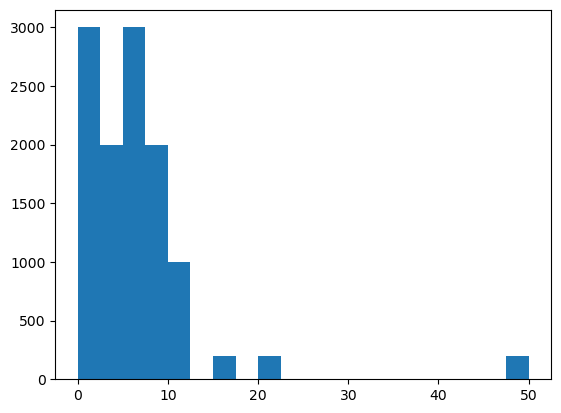

In [31]:
_ = plt.hist(lista_final, bins=20)
_ = plt.show()

In [40]:
np.quantile(lista_final, .25), np.quantile(lista_final, .5), np.quantile(lista_final, .75) 

(2.0, 5.0, 8.0)

Repare que todos percentis estão entre 0-10, demonstrando que os valores estão, em sua maioria, nessa faixa. Entretanto, quando olhamos para o topo, temos um valor que é muito maior que os demais. Isso demonstra que nossos dados são assimétricos e que temos alguns outliers.

Uma das formas de se observar a distribuição dos dados é olhando um histograma, um gráfico de barras com o eixo y representando a frequência e o eixo x os valores. Se você não é familiarizado com o histograma, faça uma pequena pausa para ler sobre o gráfico. Eu sugiro [este post da Alura](https://www.alura.com.br/artigos/o-que-e-um-histograma)

#### DESAFIO
Imagine que eu te diga que o salário/hora de meus funcionários possuem os seguintes percentis:
- p25 = 50
- p50 = 100
- p75 = 150
- p99 = 190

Por outro lado, as idades deles possuem os seguintes percentis:
- p25 = 20
- p50 = 25
- p75 = 28
- p99 = 70

Como você imaginaria que a distribuição salarial e etária se pareceria? Discorra sobre o assunto com seus colegas. Tentem imaginar quais os possíveis histogramas para cada um dos conjuntos de dados.

# Boxplots

Boxplots também servem para apresentar distribuições. Entretanto, o foco nele é olhar para os quartis, mediana e outliers. Dessa vez, para já começarmos a integrar a estatística básica com a análise de dados, vamos olhar os dados de Churn de uma Telecom.

Para baixar o dataset, acesse o seguinte link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [41]:
# carrega a biblioteca pandas
import pandas as pd

# carrega dataset
df = pd.read_csv('Telco_Churn.csv')

# primeiras linhas
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

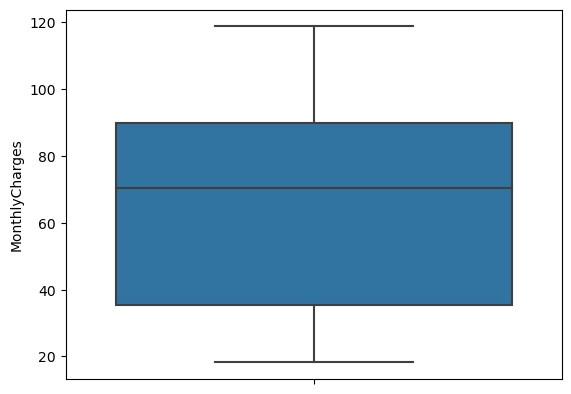

In [42]:
# plotar boxplot
import seaborn as sns

_ = sns.boxplot(y = 'MonthlyCharges', data=df) 
_ = plt.show()

Veja como funciona um boxplot: a caixa que você vê em azul é delimitada pelo 1º e 3º quartil. Ou seja, abaixo dela, estão os 25% menores valores e acima estão os 25% maiores. O traço no meio representa a mediana, ponto que divide os dados em 50-50. Por fim, temos os traços na horizontal delimitando o maior e menor valor.

Em outras palavras, usamos o boxplot para entender o quão assimétrico estão nossos dados olhando para os quartis. Se quiser ler um pouco mais sobre o gráfico, veja [este post da Fernanda Maciel](https://blog.proffernandamaciel.com.br/como-ler-um-boxplot/).

Ou seja, olhando para as cobranças mensais da companhia telefônica sendo analisada, temos:
- 25% dos clientes pagam menos que algo em torno de 36-38 reais (ou qualquer que seja a moeda);
- A mediana das cobranças está em torno de uns 70 reais;
- A menor e maior cobrança tem uma distância de mais ou menos 100 reais.

Podemos olhar a distribuição entre a cobrança de quem é churn e de quem não é churn, isso deve dizer muito sobre a relação entre as duas variáveis:

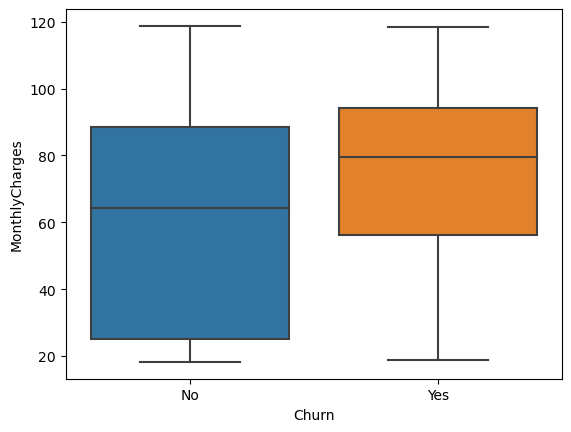

In [46]:
_ = sns.boxplot(x = 'Churn', y='MonthlyCharges', data=df)
_ = plt.show()

Olha que interessante, a mediana da cobrança mensal de quem é Churn é bem mais alta do que a de quem não é. Ou seja, enquanto 50% dos que não são Churn recebem cobranças em otrno de 70 reais, para quem é Churn, esse número sobe para 80 reais. Para que quanto mais alto o valor de cobrança, maior a chance de Churn!

Se você quiser validar, estes números estão na função describe() do Pandas:

In [47]:
df.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Agora, vamos ver como ficou seu entendimento das métricas. Olhando apenas para a média, percentis e desvio padrão, como você imagina a distribuição de Total Charges? Verifique com um boxplot se isso é real!

In [48]:
df.TotalCharges.replace(' ', '0').astype('float32').describe()

count    7043.000000
mean     2279.732178
std      2266.794434
min         0.000000
25%       398.549988
50%      1394.550049
75%      3786.599976
max      8684.799805
Name: TotalCharges, dtype: float64

E também vamos fazer o inverso: a partir do boxplot de tenure, você consegue saber mais ou menos o valor da média, mediana, desvio padrão, etc?

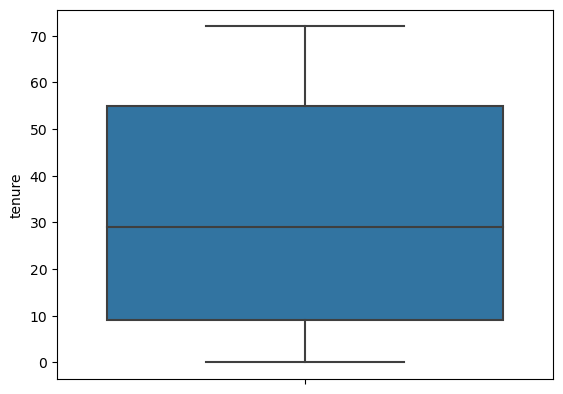

In [49]:
_ = sns.boxplot(y = df.tenure)
_ = plt.show()

Agora, você já tem bastante informação para fazer muita coisa, ein?! Que tal pegar aquele dataset da Olist, que eu deixei como tarefa em alguma das semanas passadas e olhar para as distribuições de cada variável? Você pode inclusive olhar para distribuições de numéricas na visão de diferentes categorias de outra coluna, assim como fizemos para a cobrança por churn! Você também pode fazer um post no Medium ensinando sobre todas as medidas resumos que aprendemos e o código em Python para cada uma delas. Se quiser deixar ainda mais completo, pode buscar os códigos em R também! Eu garanto que não demora nem 5 minutos no Google!